In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import os

In [3]:
os.chdir(os.path.dirname(os.getcwd()))

In [6]:
df = pd.read_csv("data/train.csv", index_col=0)

In [7]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,meses_sin_actualizar,grupomeses,version_actual,grupoversiones,version_android,Descargas,Genero2,media_inst_grp_ver,mediana_inst_grp_ver,med_versandroid
8116,VidPlay,VIDEO_PLAYERS,4.2,3546.0,3.7M,1000000,Free,0.00,Everyone,Video Players & Editors,...,72.0,9.0,2,2.0,12,13.0,2.267882e+07,5172341,100000,7699768.0
7071,Security Camera CZ,HOUSE_AND_HOME,4.4,137.0,19M,10000,Free,0.00,Everyone,House & Home,...,70.0,12.0,1,1.0,12,9.0,1.487807e+06,2985549,10000,7699768.0
6068,Nur təfsiri 1-ci cild,LIBRARIES_AND_DEMO,5.0,15.0,1.4M,1000,Free,0.00,Everyone,Libraries & Demo,...,85.0,4.0,1,1.0,1,7.0,7.250289e+05,2985549,10000,396040.0
815,Awake Dating,DATING,5.0,2.0,70M,100,Free,0.00,Mature 17+,Dating,...,70.0,12.0,2,2.0,11,5.0,9.010224e+05,5172341,100000,6569869.0
7364,Steam: Rails to Riches,FAMILY,4.2,214.0,67M,5000,Paid,4.99,Everyone,Board;Brain Games,...,77.0,6.0,3,2.0,12,8.0,2.248956e+06,5172341,100000,7699768.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,Morse Decoder for Ham Radio,COMMUNICATION,3.7,166.0,2.0M,5000,Paid,4.99,Everyone,Communication,...,86.0,3.0,1,1.0,5,8.0,3.731925e+07,2985549,10000,2896920.0
5191,Learn C Programming (Examples) (OFFLINE),FAMILY,4.3,43.0,3.7M,10000,Free,0.00,Everyone,Education,...,77.0,6.0,1,1.0,12,9.0,1.014363e+06,2985549,10000,7699768.0
5390,MARVEL Contest of Champions,GAME,4.3,2468063.0,92M,50000000,Free,0.00,Teen,Action,...,70.0,12.0,19,3.0,9,16.0,1.235847e+07,9480301,1000000,4274484.0
860,B612 - Beauty & Filter Camera,PHOTOGRAPHY,4.4,5276983.0,Varies with device,100000000,Free,0.00,Everyone,Photography,...,70.0,12.0,7,3.0,4,17.0,1.816586e+07,9480301,1000000,3149557.0


<Axes: >

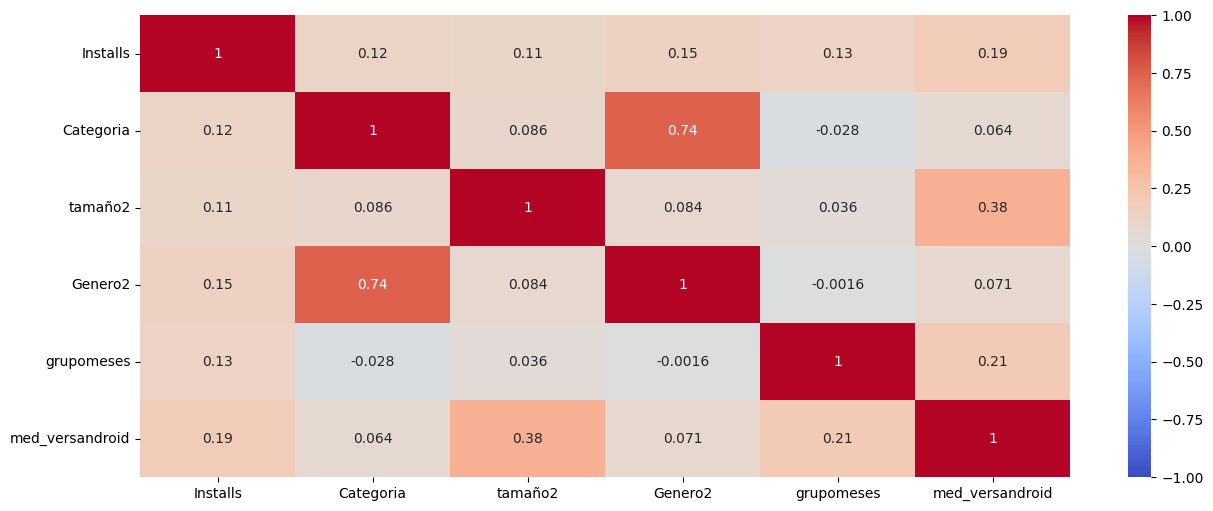

In [15]:
plt.figure(figsize=(15,6))
sns.heatmap(df[["Installs","Categoria","tamaño2", "Genero2", "grupomeses", "med_versandroid"]].corr(),vmin=-1, annot=True, cmap="coolwarm")

In [16]:
X = df[["Categoria","tamaño2", "Genero2", "grupomeses", "med_versandroid"]]
y = df['Installs']

# Apenas hay correlación, vamos a probar antes clasificación.